<a href="https://colab.research.google.com/github/51stDimension/AIML/blob/main/Experiments/BackPropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
# v01 v02
# v11 v12
# v21 v22

# w0 w1 w2

rows, cols = (3, 3)
v = [[0]*cols]*rows
print(v)

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]


In [2]:
v = [[0,0.3,0.5],[0,0.6,-0.3],[0,-0.1,0.4]]

deltav = [[0,0,0],[0,0,0],[0,0,0]]
w = [-0.2,0.4,0.1]
  
deltaw = [0,0,0]
alpha = 0.25

In [3]:
v

[[0, 0.3, 0.5], [0, 0.6, -0.3], [0, -0.1, 0.4]]

In [4]:
def activationFunction(x):
  ans = (1 - math.exp(-x))/(1 + math.exp(-x))
  return ans

def derivativeActivationFunction(x):
  ans = (0.5*(1+x)*(1-x))
  return ans

In [5]:
activationFunction(-0.22526)

-0.11215614768994976

In [6]:
x = [0,-1,1]
target = 1

In [7]:
epoch = 1
data = []
while epoch<1000:
  zin1 = v[0][1] + (x[1]*v[1][1]) + (x[2]*v[2][1])
  zin2 = v[0][2] + (x[1]*v[1][2]) + (x[2]*v[2][2])
  z1   = activationFunction(zin1)
  z2   = activationFunction(zin2) 
  yin  = w[0] + z1*w[1] + z2*w[2]
  y    = activationFunction(yin)
  errorPortionK1 = (target - y)*derivativeActivationFunction(y)

  # Calculate changes in weight w0,w1,w2
  deltaw[1] = alpha*errorPortionK1*z1
  deltaw[2] = alpha*errorPortionK1*z2
  deltaw[0] = alpha*errorPortionK1

  # calculate error portion between input and hidden layer
  errorIn1 = errorPortionK1*w[1]
  errorIn2 = errorPortionK1*w[2]

  e1 = errorIn1*derivativeActivationFunction(z1)
  e2 = errorIn2*derivativeActivationFunction(z2)

  # Calculate weight changes
  deltav[1][1] = alpha*e1*x[1]
  deltav[2][1] = alpha*e1*x[2]
  deltav[0][1] = alpha*e1
  deltav[1][2] = alpha*e2*x[1]
  deltav[2][2] = alpha*e2*x[2]
  deltav[0][2] = alpha*e2

  # Update data
  for i in range(0,3):
    for j in range(0,3):
      v[i][j] += deltav[i][j]

  for k in range(0,3):
    w[k] += deltaw[k]

  data.append([epoch,e1,e2])
  epoch = epoch+1

In [8]:
  print('Value after all 1000 epochs: ')
  print('Error Values: ',e1,e2)
  print('v11',v[1][1])
  print('v12',v[1][2])
  print('v21',v[2][1])
  print('v21',v[2][1])
  print('v01',v[0][1])
  print('v02',v[0][2])
  print('w0',w[0])
  print('w1',w[1])
  print('w2',w[2])

Value after all 1000 epochs: 
Error Values:  0.0002561661010491176 0.00022544657255762747
v11 0.1278345360119072
v12 -0.7599076117545077
v21 0.3721654639880931
v21 0.3721654639880931
v01 0.7721654639880926
v02 0.9599076117545076
w0 2.276340819568257
w1 0.6876055822168512
w2 1.8026464004249287


In [9]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame(data, columns=['Epoch', 'e1', 'e2'])

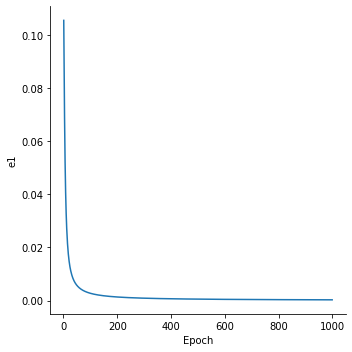

In [10]:
df
sns.relplot(data=df, x="Epoch", y="e1", kind="line")

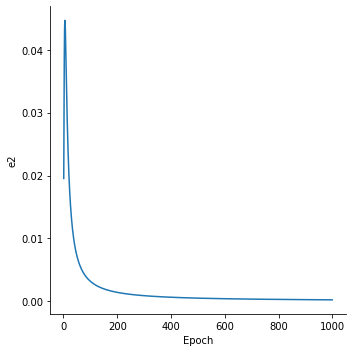

In [11]:
sns.relplot(data=df, x="Epoch", y="e2", kind="line")